## Get the data from TidyTuesday GitHub


In [ ]:
# Import libraries for today's session
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
import statsmodels.api as sm

Data is loaded from the RforDatascience GitHub. However, it is also available through python libraries, seaborn and sklearn. 

In [ ]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')

# If you want to load data from seaborn, using this
# penguins = sns.load_dataset('penguins')


### **Data Dictionary**

The columns included in `penguins` are: 

<div id = 'adelie'>
    <div class = "inline-block">
        <figure><img src = 'adelie.jfif' width = "20%" height = "20%"><figcaption>Adelie</figcaption></figure>
    </div>
    <div class = "inline-block">
        <figure><img src = 'gentoo.jpg' width = "20%" height = "20%"><figcaption>Gentoo</figcaption></figure>
    </div>
    <div class = "inline-block">
        <figure><img src = 'chinstrap.jfif' width = "10%" height = "10%"><figcaption>Chinstrap</figcaption></figure>
    </div>
 </div>   
        

 
| Variable | Class   | Description   |
|------|------|------|
|   species  | integer| Penguin speciese (Adelie, Gentoo, Chinstrap)
|   island   | integer| Island where recorded (Biscoe, Dream, Torgersen)
|   bill_length_mm  |  double  | Bill length in millimieters (also known as culmen length)
|   bill_depth_mm  |  double  | Bill depth in millimieters
|   flipper_length_mm  | integer  | Flipper length in mm
|   body_mass_g  |  integer  | Body mass in grams
|   sex   | integer | sex of the animal
|   year  | integer  | year recorded

More information about **TidyTuesday** in general can be found in the [TidyTuesday GitHub](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-28/readme.md)

## 1. Explore the data 

Let's look at the first 5 records of `penguins`. (Note: in `R` it will be `head(penguins)`)

Your Answer:

Can you also try to find out the **shape** of the data to find out number of rows and columns? 

Your Answer:

In [ ]:
penguins.info()

`pandas.info()` function prints information about a dataframe including the index data type and columns, non-null values and memory usage. 

Similar to `pandas.info()`, we can use `DataFrame.describe` to generate descriptive statistics of DataFrame columns. (Note: in R, summary())

In [ ]:
penguins.describe() 

In [ ]:
penguins.mode() # looking at the mode of data, We will use this for handling missing data part.... 

Let's check the completeness of the penguins dataset!

In [ ]:
penguins[penguins.isnull().any(axis = 1)]

`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` and `sex` would appear to have missing values. 

You can use `DataFrame.any` with parameter `axis = 1` for check at least one `True` in row by `DataFrame.isnull` with `boolean indexing`. 

The most common `missing` (NaN) values are from **sex** column. 
Two rows (index 3 and 271) has almost all values are null. 

## 2. Handle missing values

Pandas document explains various ways of handling missing values. (https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)


Let's check null data again.

In [ ]:
penguins.isnull().sum()

First, we will drop 2 rows with null values for almost all variables.

In [ ]:
penguins.drop(penguins[penguins['bill_length_mm'].isnull()].index, axis = 0, inplace = True)

`inplace = True`, the data is modified in place. it means it will return nothing and the data frame is updated. (if you want to keep original one, you can give new DataFrame name and not setting inplace = True). 

You can try to impute by using mean/median values of bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g instead of drop them all together.

In [ ]:
#penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value = penguins['bill_length_mm'].mean())
#penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value = penguins['bill_length_mm'].median())

Let's impute the null values in sex with its mode (which is Male) (penguins.mode())

In [ ]:
penguins['sex'] = penguins['sex'].fillna('male')

Let's check again for number of null values in the dataset

In [ ]:
penguins.isnull().sum()

## 3. continue to explore the data 

How many penguins in each species? 

In [ ]:
penguins['species'].value_counts()

value_counts() return a series containing counts of unique rows in the DataFrame. 

Using seaborn library, let's create simple bar chart of species

In [ ]:
sns.countplot(x = 'species', data = penguins, palette = ("#005EB8","#0072CE","#00A9CE"))
plt.title ("Number of penguins by species")
plt.xlabel ("Species")
_ = plt.ylabel("Number of penguins")


Now it's your turn! How many penguins in each island? Can you create bar chart by island?

https://seaborn.pydata.org/examples/index.html (For more information about the Seaborn library)

Your Answer:

I want to briefly show to use Numpy library too. You can acheive the same thing. The difference is it returns as array (not DataFrame). Numpy, short for Numerical Python is one of the most important foundational packages for numerial computing in Python. (i.e. tensorflow, pytorch they are based on similar concept)

In [307]:
np.unique(penguins.island, return_counts = True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array([167, 124,  51], dtype=int64))

Let's carry on exploring other variables.
We expect to see distinctive characters in bill length, bill depth, flipper length and body mass by species as these kinds of observations are what distinguish different species.

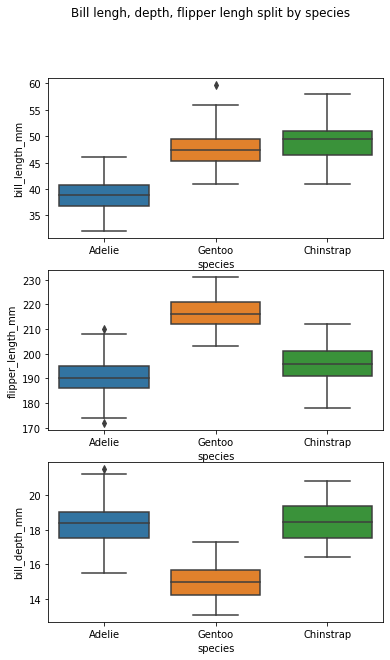

In [310]:
fig,axs = plt.subplots(3, figsize = (6,10))

fig.suptitle("Bill lengh, depth, flipper lengh split by species")

sns.boxplot(y= 'bill_length_mm', x = 'species', data = penguins, ax= axs[0])
sns.boxplot(y= 'flipper_length_mm', x = 'species', data = penguins, ax= axs[1])
_ = sns.boxplot(y = 'bill_depth_mm', x = 'species', data = penguins, ax = axs[2])

Can you try to do boxplot for body mass by species? (just one boxplot so don't need fig, axs part) and which penguin species are the heaviest?

Your Answer:

We can also split body mass further by sex as well by using `hue` parameter. 

https://seaborn.pydata.org/tutorial/axis_grids.html


In [ ]:
sns.boxplot(y= 'body_mass_g', x = 'species', data = penguins, hue = 'sex' )
plt.title ("Penguin's body mass compared by sex")
plt.xlabel ("Species")
_ = plt.ylabel("Body mass (g)")


All species weight does vary against sex. Shall we try simple t-test using numpy to see if female and male penguins' body mass is significantly different?

In [ ]:
f = penguins[penguins.sex == 'female']['body_mass_g'].to_numpy()/1000 #simply change to kg

In [ ]:
m = penguins[penguins.sex == 'male']['body_mass_g'].to_numpy()/1000 #simply change to kg

In [ ]:
st.ttest_ind(f, m, equal_var = False)

Okay - t-test suggests that body mass in female/male penguins are significantly different. 

## 4. Predict penguin sex

We've looked into various syntax to explore data. Let's build a simple model to predice penguin's sex.

In [ ]:
np.unique(penguins['sex'], return_counts = True)

In [ ]:
np.unique(penguins['species'], return_counts = True)

Can you try to see unique count of island using numpy way?

Your Answer:

In [ ]:
sns.displot(penguins['bill_length_mm'], color = '#006747', kde = True)
plt.title ("All penguin's bill length distribution")
plt.xlabel ("Bill length (mm)")
_ = plt.ylabel("Number of penguins")


Can you plot bill depth(bill_depth_mm) using displot? You can give different colours,title and x and y label title too.

Your Answer:

In [ ]:
# seaborn relational plot 
_ = sns.relplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = penguins, hue = 'sex', size = 'body_mass_g' , col = 'species')

ggplot equivalent for the comparison: 
penguins %>%
  ggplot(aes(bill_length_mm, bill_depth_mm, color = sex, size = body_mass_g)) +
  geom_point(alpha = 0.5) +
  facet_wrap(~species)

It looks like female penguins are smaller with different bills. 

Let's create a new column and we will recode: 1 = male / 0 = female.

In [ ]:
penguins['sex_recode'] = penguins['sex']
penguins

In [ ]:
penguins['sex_recode'] = np.where(penguins['sex'] == 'male', 1, 0) 
penguins
# Quick note: 
#penguins = penguins.replace({'species_recode' : { 'Adelie' : 0, 'Gentoo' : 1, 'Chinstrap' : 3 }}): if you have mutiple columns you can do this way (key:value mapping)

In [ ]:
y = penguins['sex_recode']
y

Using Pandas.get_dummies function to convert categories variables (i.e. sex, island) into dummy/indicator variables. We can use dummy variables into our logistic regression.
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
s = pd.get_dummies(penguins['species'])
s

In [ ]:
X = pd.concat([s.Chinstrap, s.Gentoo, penguins.flipper_length_mm, penguins.bill_length_mm, penguins.bill_depth_mm, penguins.body_mass_g, ], axis = 1)
X

We use *Statsmodels* and this is a python module which provides various functions for estimating different statistical models and performing statistical tests. 

In [ ]:
X = sm.add_constant(X)
X

Run logistic model using *Statsmodels.Logit* function

In [ ]:
model = sm.Logit(y, X) 

In [ ]:
result = model.fit()

In [ ]:
result.summary()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format # to turn off scientific notation
params = result.params


In [ ]:
# Odd ratio
print(np.exp(params))

The largest odd ratio is for bill depth , with second largest for bill length. An increase of 1mm in bill depth corresponds to almost four times higher odds of being male. We can think that characterisrics of bills must be associated with penguin's sex.

## Predict penguin sex using sklearn library

Building Machine Learning Models using Sklearn library. 

In [ ]:
X = penguins.iloc[:,2:5].values
X
y = penguins.iloc[:,6].values
y

pandas.iloc: integer location based indexing for selection by position. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

Encode targer labels (sex in our case) with value between 0 and n_classes-1 (0 = female, 1= male)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train

Split arrays or matrices into random train and test subsets.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
when random_state is set to an integer, train_test_split will return same results for each execution.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
n_estimators: the number of trees in the forest. default is 100 and we kept default value

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
Y_prediction = random_forest.predict(X_test)
Y_prediction

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score, recall_score, f1_score
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
accuracy_rf

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

You can read this blog to understand confusion matrix, and other types of classification report. 
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56